In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [8]:

# Load red and white wine datasets using raw paths
red_df = pd.read_csv(r"C:\Users\amban\ANA680\Week3\winequality-red.csv", sep=';')
white_df = pd.read_csv(r"C:\Users\amban\ANA680\Week3\winequality-white.csv", sep=';')

# Add wine type column
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# Combine datasets
combined_df = pd.concat([red_df, white_df], ignore_index=True)

# Encode wine_type as binary
combined_df['wine_type'] = combined_df['wine_type'].map({'red': 0, 'white': 1})

# Save the combined dataset to a new CSV file
combined_df.to_csv(r"C:\Users\amban\ANA680\Week3\winequality_combined.csv", index=False)

print("Combined dataset saved successfully.")


Combined dataset saved successfully.


In [10]:

# Load the combined wine dataset
df = pd.read_csv(r"C:\Users\amban\ANA680\Week3\winequality_combined.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB

Descriptive Statistics:
       fixed acidity  volatile acidi

C:\Users\amban\AppData\Local\Temp\ipykernel_34820\663740484.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


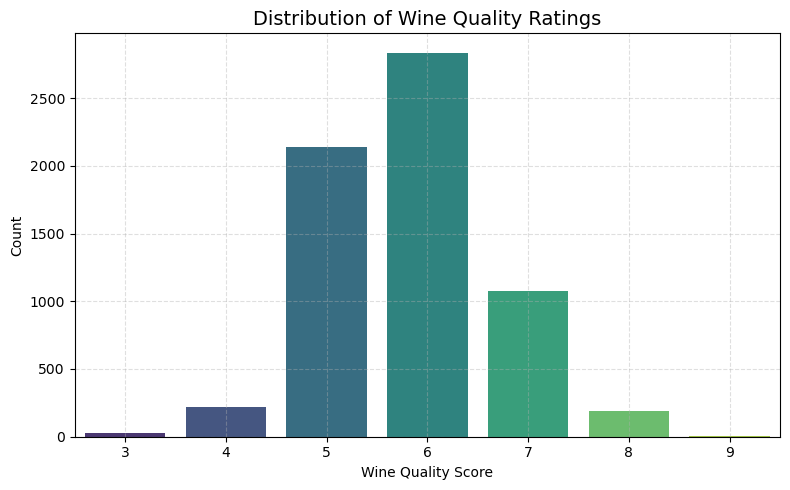

In [19]:
# Check data structure and stats
print("Dataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Plot the distribution of wine quality scores
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribution of Wine Quality Ratings", fontsize=14)
plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


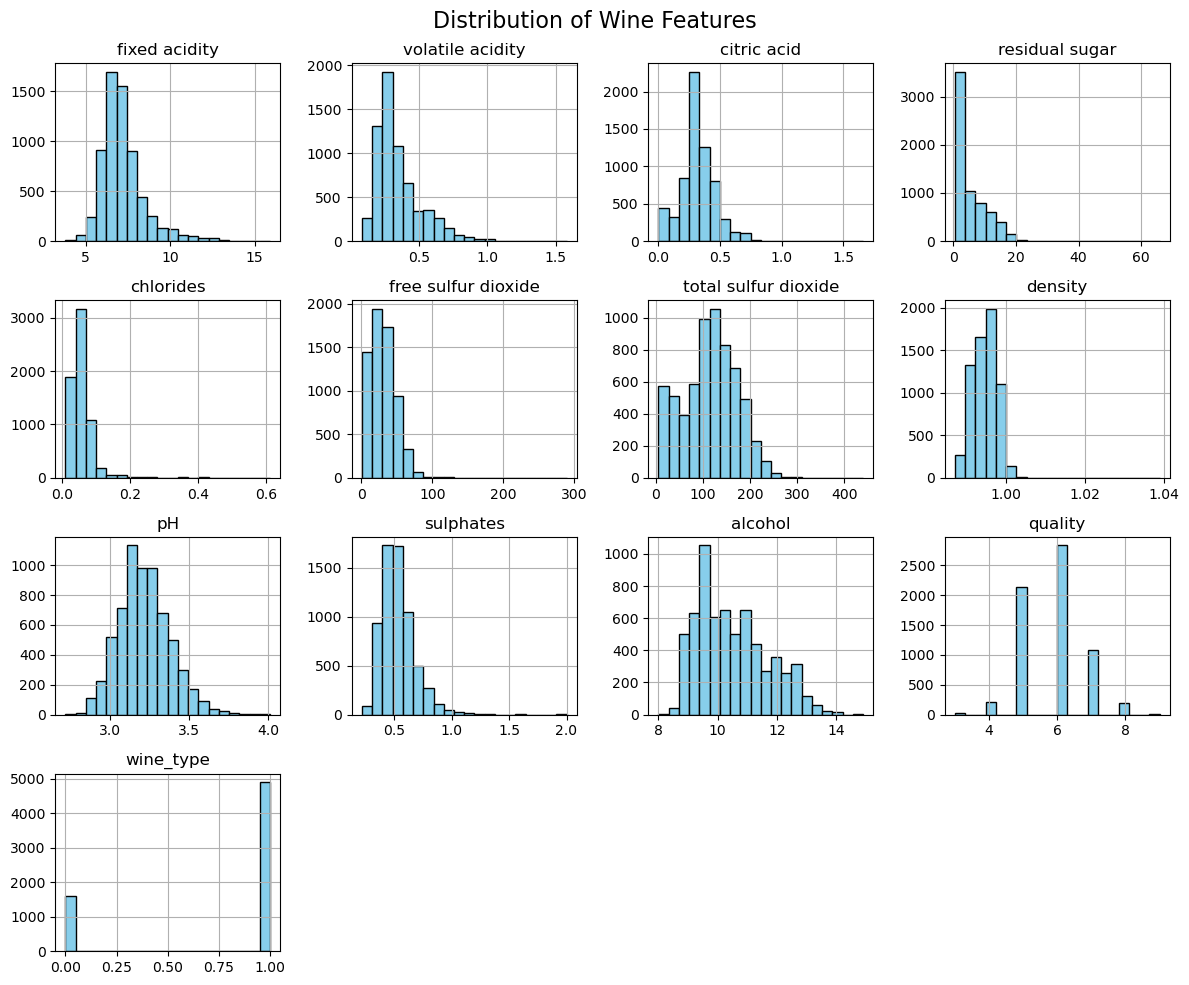

In [20]:
# Plot histograms for all columns
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Wine Features", fontsize=16)
plt.tight_layout()
plt.show()


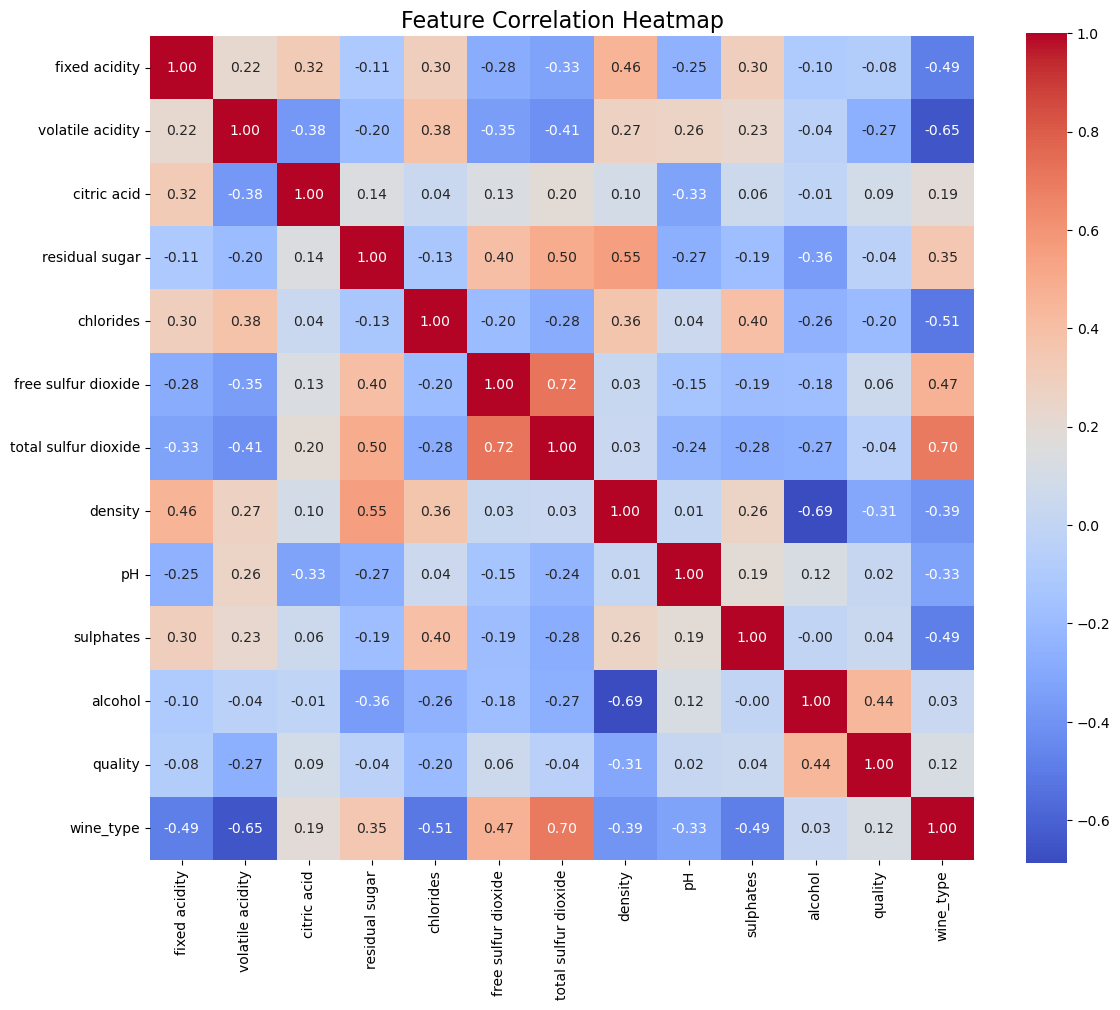

In [21]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
# Drop target column (quality) from features
X = df.drop("quality", axis=1)
y = df["quality"]


In [14]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"🔍 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


🔍 Random Forest Accuracy: 0.6908
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.57      0.09      0.16        43
           5       0.74      0.72      0.73       428
           6       0.67      0.79      0.72       567
           7       0.66      0.58      0.62       216
           8       0.93      0.36      0.52        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.51      0.36      0.39      1300
weighted avg       0.69      0.69      0.68      1300

--------------------------------------------------


C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 SVC Accuracy: 0.5723
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        43
           5       0.64      0.60      0.62       428
           6       0.54      0.76      0.63       567
           7       0.56      0.25      0.35       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.39      0.23      0.24      1300
weighted avg       0.57      0.57      0.54      1300

--------------------------------------------------


C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Logistic Regression Accuracy: 0.5408
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.05      0.09        43
           5       0.58      0.54      0.56       428
           6       0.52      0.72      0.60       567
           7       0.54      0.29      0.38       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.38      0.23      0.23      1300
weighted avg       0.54      0.54      0.51      1300

--------------------------------------------------
🔍 KNN Accuracy: 0.5585
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.15      0.09      0.11        43
           5       0.59      0.61      0.60       428
           6       0.57      0.62      0.60       567
           7       

C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amban\anaconda3\Lib\site-packag

In [18]:
best_model_name = max(results, key=results.get)
print(f"Best Performing Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Performing Model: Random Forest with Accuracy: 0.6908


In [22]:

# Retrieve the best model from the dictionary
best_model = models[best_model_name]

# Save the best model as a pickle file
model_path = "model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(best_model, f)

print(f"Best model '{best_model_name}' saved successfully as '{model_path}'")


Best model 'Random Forest' saved successfully as 'model.pkl'


In [23]:
scaler_path = "scaler.pkl"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print(f"Scaler saved successfully as '{scaler_path}'")


Scaler saved successfully as 'scaler.pkl'
